In [3]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [4]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_file = FileEmcee(z_dependence=True, bin_test=True, info_file='0.01_0.4')
emcee_file_a3 = FileEmcee(z_dependence=True, bin_test=True, info_file='a3prior')
emcee_file_00_04 = FileEmcee(z_dependence=True, bin_test=True, info_file='0.0_0.4')
emcee_file_a3deeper = FileEmcee(z_dependence=True, bin_test=True, info_file='a3deeper')
emcee_run = EmceeRun(emcee_file)
emcee_run_a3 = EmceeRun(emcee_file_a3)
emcee_run_00_04 = EmceeRun(emcee_file_00_04)
emcee_run_a3deeper = EmceeRun(emcee_file_a3deeper)

In [5]:
plotter = Plotter(bgs, emcee_run)
plotter_a3 = Plotter(bgs, emcee_run_a3)
plotter00_04 = Plotter(bgs, emcee_run_00_04)
plotter_a3deeper = Plotter(bgs, emcee_run_a3deeper)

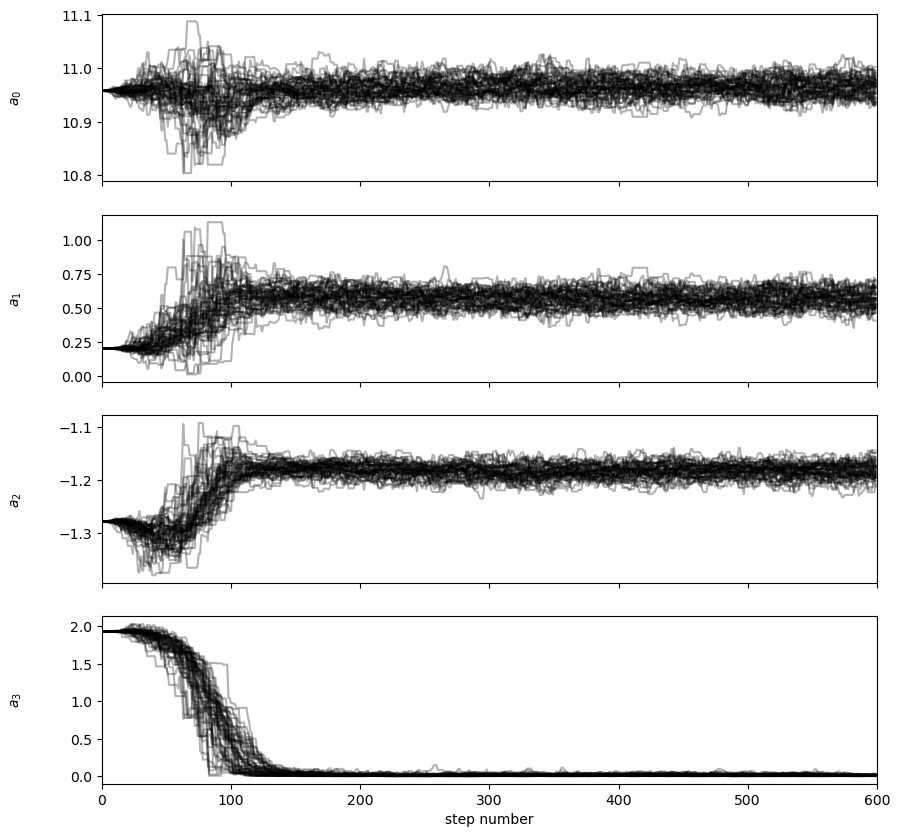

In [6]:
plotter.plot_emcee_samples()

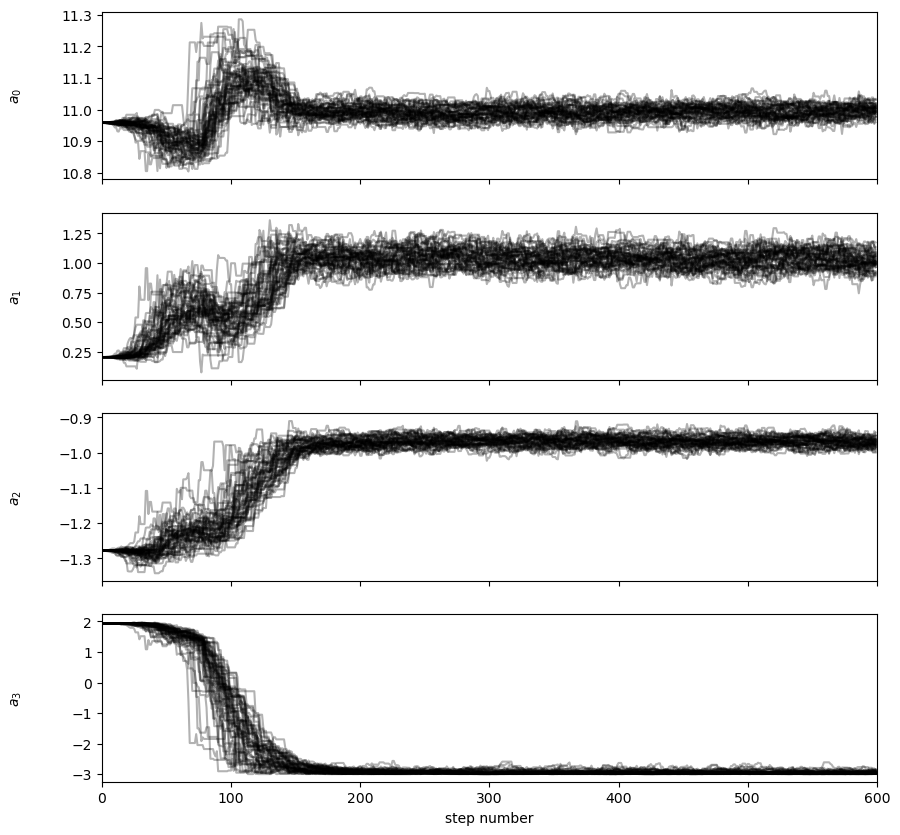

In [7]:
plotter_a3.plot_emcee_samples()

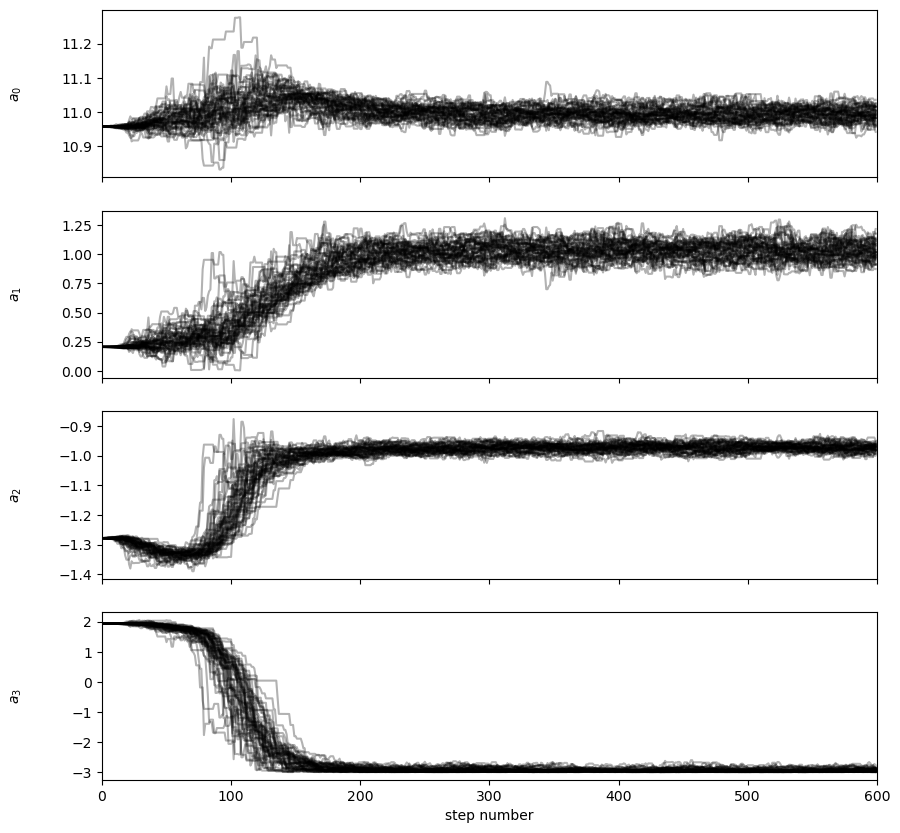

In [8]:
plotter00_04.plot_emcee_samples()

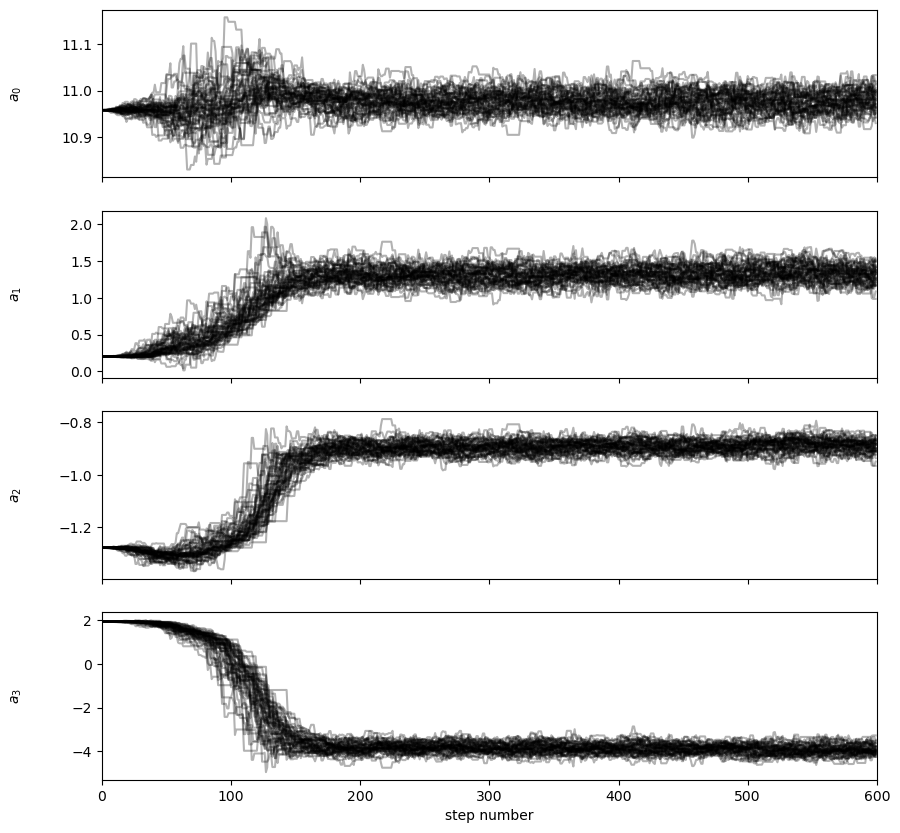

In [9]:
plotter_a3deeper.plot_emcee_samples()

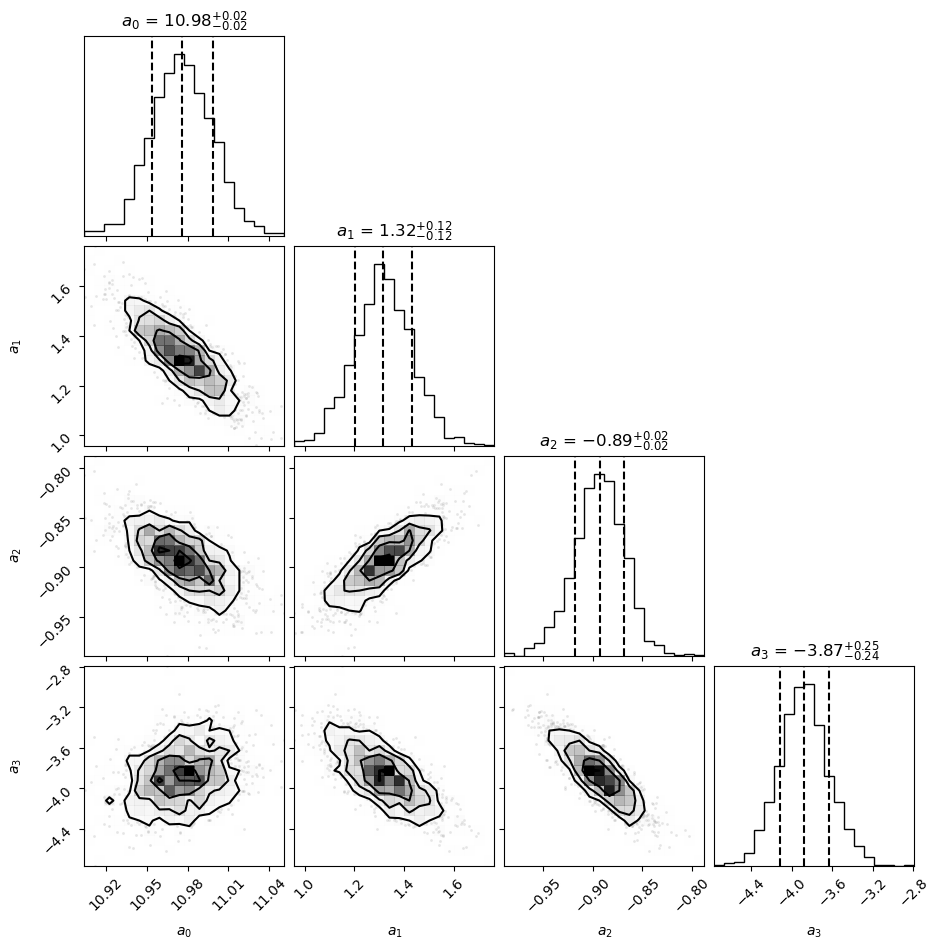

In [10]:
emcee_run_a3deeper.set_best_params(150)
plotter_a3deeper.plot_emcee_corner(emcee_run_a3deeper.flat_samples, emcee_run_a3deeper.labels4)

In [12]:
emcee_run.set_best_params(discard=150)
best_params = emcee_run.get_best_params()

best_params_a3deeper = emcee_run_a3deeper.get_best_params()

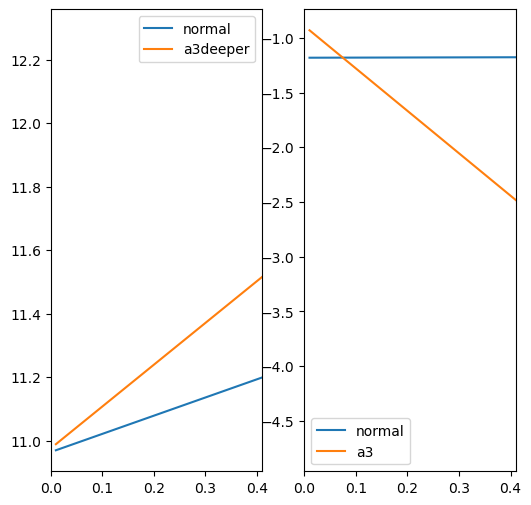

In [13]:
z = np.linspace(0.01,1,100)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(z, best_params[0] + best_params[1]*z, label='normal')
plt.plot(z, best_params_a3deeper[0] + best_params_a3deeper[1]*z, label='a3deeper')
plt.xlim(0,0.41)
plt.legend()

plt.subplot(1,2,2)
plt.plot(z, best_params[2] + best_params[3]*z, label='normal')
plt.plot(z, best_params_a3deeper[2] + best_params_a3deeper[3]*z, label='a3')
plt.xlim(0,0.41)
plt.legend()

In [14]:
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)

/Users/federico/Library/CloudStorage/OneDrive-UniversityCollegeLondon/PhD/PhD_project/bgs_psmf/nb/../VMaxDensity.py:19: RuntimeWarning: divide by zero encountered in divide
  _w = self.w_spec / (self.vmax.clip(v_zmin, v_zmax) - v_zmin)


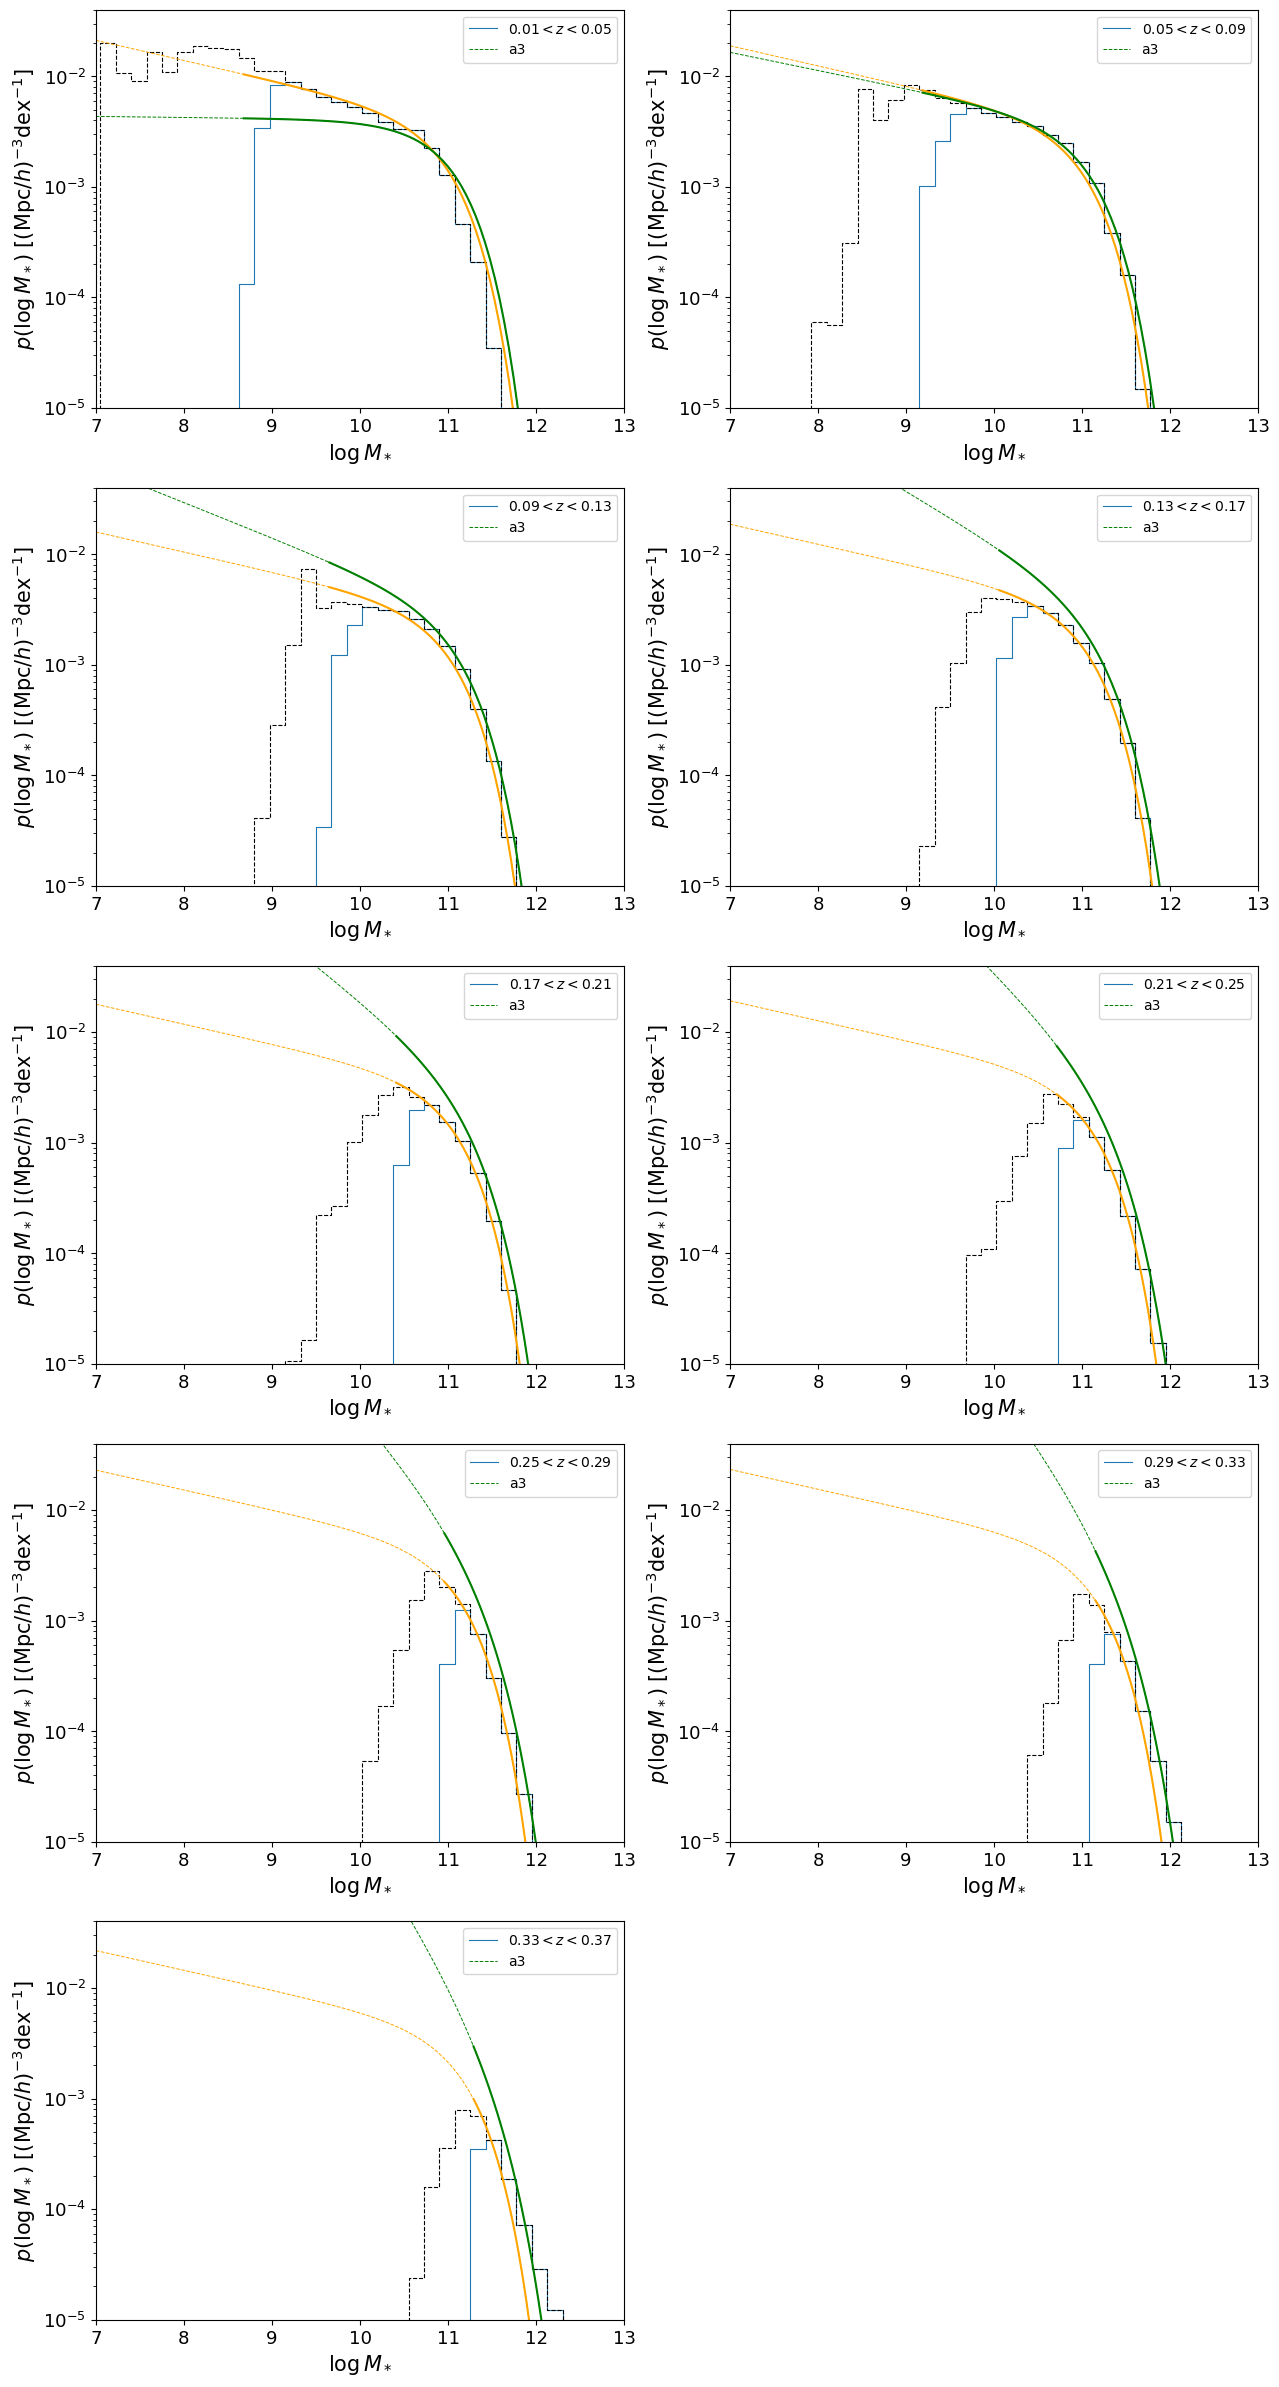

In [15]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,30))

plot_params_ext = {'color': 'orange', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'orange', 'linestyle':'-'}

plot_params_ext2 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7, 'label':'a3'}
plot_params2 = {'color':'green', 'linestyle':'-'}

# plot_params_ext3 = {'color': 'red', 'linestyle':'--', 'linewidth':0.7}
# plot_params3 = {'color':'red', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(5,2,i+1)
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)
    n2 = z_smf.normalisation2(best_params)
    # n3 = z_smf.normalisation3(best_params)

    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)
    # print(z_smf.mlim.min())
    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    Plotter.plot_zschechter(x_lin, z0, n, best_params_a3deeper, **plot_params2)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params_a3deeper, **plot_params_ext2)


    # inds = np.random.randint(len(emcee_run.flat_samples), size=100)
    # for ind in inds:
    #     z_smf_err = ZSchechterModel(bgs, zmin, zmax, z0)
    
    #     n_err = z_smf_err.normalisation(emcee_run.flat_samples[ind])
    #     Plotter.plot_zschechter(x_lin_ext, z0, n_err, emcee_run.flat_samples[ind], **{'alpha':0.2})

    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    